In [ ]:
# 머신러닝 교재 -> 비밀번호 Bigdata!
'''
어느 정도 규모가 있는 샘플 데이터를 입력으로 넣어 분석 
-> 데이터에서 일정한 규칙을 찾아냄
-> 찾아낸 규칙을 기반으로 다른 데이터를 분류하거나 미래를 예측
'''

# 특징 추출 : 데이터가 어떤 특징을 가지고 있는지 찾고 벡터로 만드는 변환 처리
#            어떤 특징을 추출할 지는 프로그래머가 결정!

# 회귀 분석(regression analysis) : Y가 연속된 값일 때 Y = f(x)와 같은 모델로 나타내는 것
#                                선형 회귀(가장 기본적 모델) : Y = aX + b

# 지도학습 (Supervised learning) : 데이터와 함께 답을 입력하고 다른 데이터의 답을 예측
# 비지도학습 (Unsupervised learning) : 데이터는 입력하지만 답은 입력하지 않고, 다른 데이터의 규칙성을 찾음 - 최종적으로 내야하는 답이 정해져 있지 않다
# 강화학습 (Reinforcement learning) : 현재 상태를 관찰해서 어떻게 대응해야 할지와 관련된 문제를 다룸 (최선의 행동을 스스로 테스트하며 학습)
#                                    부분적으로 답을 입력하고, 데이터를 기반으로 최적의 답을 찾아냄

### 데이터 수집 -> 가공 -> 학습 (방법 선택 -> 매개변수 조정 -> 모델 학습) -> 모델 평가     : 정밀도가 떨어지면 매개변수/알고리즘 재조정
# 수집 : 프로그램이 다루기 쉬운 형태로 데이터를 가공할 때 머신러닝에 어떠한 특징을 활용할지, 어떤 형식으로 가공해야할지 생각
# 학습 :  어떤 방법(알고리즘)을 사용해 학습을 시킬지 생각

In [ ]:
# SVM 알고리즘 장단점
# 장점 : 비선형 분리 데이터를 커널트릭을 사용하여 분류 모델링 가능
#       고차원 공간에서 원활하게 작동
#       텍스트 분류 및 이미지 분류에 효과적

# 단점 : 대용량 데이터셋 처리에는 많은 시간이 소요(마진 길이가 줄어듬)
#       

In [10]:
### scikit-learn : 머신러닝 프레임워크
# pip install -U scikit-learn scipy scikit-image

### XOR(배타적 논리합) 연산 = 둘 중 하나는 거짓이어야 참 ! (모두 참이거나 모두 거짓일 때는 거짓)

### XOR 연산을 학습하는 프로그램
from sklearn import svm

# XOR의 계산 데이터
xor_data = [
    # P, Q, Result
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
]

# 학습을 위해 데이터와 레이블 분리
data = []
label = []
for row in xor_data :
    print(row)
    p = row[0]
    q = row[1]
    re = row[2]
    data.append([p,q])
    label.append(re)

# 데이터 학습시키기
clf = svm.SVC()             # SVM 알고리즘 사용
clf.fit(data, label)        # fit() -> 트레이닝 데이터를 넣어서 학습시킴(문제, 답)

# 다른 데이터 넣어보기
data1 = [
    [2,2],
    [0,4],
    [2,0],
    [1,1]
]

# 데이터 예측하기
pre = clf.predict(data1)     # predict() -> 데이터를 넣어 예측시킴
print('예측 결과 :', pre)

# 결과 확인하기
ok = 0; total = 0
for idx, answer in enumerate(label) :
    p = pre[idx]
    if p == answer : ok += 1
    total += 1
    
print('정답률 :',ok,'/',total,'=',ok/total)

[0, 0, 0]
[0, 1, 1]
[1, 0, 1]
[1, 1, 0]
예측 결과 : [0 1 1 0]
정답률 : 4 / 4 = 1.0


In [21]:
from sklearn import svm, metrics
import pandas as pd

# XOR의 계산 데이터
xor_input = [
    # P, Q, Result
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
]

# 학습을 위해 데이터와 레이블 분리
xor_df = pd.DataFrame(xor_input)
xor_data = xor_df.iloc[:,0:2]
xor_label = xor_df.iloc[:,2]

# 데이터 학습 + 예측
clf = svm.SVC()            
clf.fit(xor_data, xor_label)
pre = clf.predict(xor_data)

# 결과 확인하기
ac_score = metrics.accuracy_score(xor_label, pre)    
print('정답률 :',ac_score)

정답률 : 1.0


#### 붓꽃 데이터 구하기 

In [ ]:
from sklearn import svm, metrics
import random, re

# 붓꽃 데이터 읽기
csv = []
with open('data/iris.csv', 'r', encoding='utf-8') as fp :
    for line in fp :
        line = line.strip()
        cols = line.split(',')
        # 문자열 데이터를 숫자로 변환하기, 숫자(소수)가 아니면 그대로
        fn = lambda n : float(n) if re.match(r'^[0-9\.]+$', n) else n
        cols = list(map(fn, cols))      
        # map() : 리스트의 요소를 지정된 함수로 처리해주는 함수 - list(map(함수, 리스트)) / tuple(map(함수, 튜플)) / list(map(자료형, 리스트))
        csv.append(cols)
        
# 헤더 제거
del csv[0]

# 데이터 섞기
random.shuffle(csv)

# 학습 데이터 / 테스트 데이터 분할 (2:1 비율)
total_len = len(csv)
train_len = int(total_len * 2 / 3)
train_data, train_label, test_data, test_label = [], [], [], []

for i in range(total_len) :
    data = csv[i][0:4]
    label = csv[i][4]
    if i < train_len :
        train_data.append(data)
        train_label.append(label)
    else :
        test_data.append(data)
        test_label.append(label)
        
# 데이터 학습시키고 예측하기
clf = svm.SVC()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)

# 정답률 구하기
ac_score = metrics.accuracy_score(test_label, pre)
print('정답률 =', ac_score)

In [65]:
#### iris를 이용한 데이터 처리 - 분할메서드 사용
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

# 붓꽃 데이터 읽어 들이기 (PANDAS)
csv = pd.read_csv('data/iris.csv')

# 필요한 열 추출
csv_data = csv[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
csv_label = csv['Name']

# 학습 전용 데이터와 테스트 전용 데이터로 나누기 - train_test_split() 메서드 활용 (순서 주의 !!)
train_data, test_data, train_label, test_label = train_test_split(csv_data, csv_label)

# 데이터 학습시키고 예측하기
clf = svm.SVC()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)

# 정답률 구하기
ac_score = metrics.accuracy_score(test_label, pre)
print('정답률 =', round(ac_score,2))


정답률 = 0.97


#### 이미지 내부의 문자 인식 

In [1]:
## 사이트 주소 : http://yann.lecun.com/exdb/mnist
## train-images-idx3-ubyte.gz / train-labels-idx1-ubyte.gz / t10k-images-idx3-ubyte.gz / t10k-labels-idx1-ubyte.gz

import urllib.request as req
import gzip, os, os.path

savepath = 'data/mnist'
baseurl = 'http://yann.lecun.com/exdb/mnist'
files = [
    'train-images-idx3-ubyte.gz',
    'train-labels-idx1-ubyte.gz',
    't10k-images-idx3-ubyte.gz',
    't10k-labels-idx1-ubyte.gz'
]

# 다운로드
if not os.path.exists(savepath) : os.mkdir(savepath)
for f in files :
    url = baseurl + '/' + f
    loc = savepath + '/' + f
    print('download :', url)
    if not os.path.exists(loc) : req.urlretrieve(url, loc)    # Retrieve a URL into a temporary location on disk.

# Gzip 압축 해제
for f in files :
    gz_file = savepath + '/' + f
    raw_file = savepath + '/' + f.replace('.gz','')
    with gzip.open(gz_file, 'rb') as fp :
        body = fp.read()
        with open(raw_file, 'wb') as w :
            w.write(body)

download : http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
download : http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
download : http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
download : http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz


In [2]:
### 이미지파일을 필요한 개수만큼만 가져오기

import struct

def to_csv(name, maxdata) :
    # 레이블 파일과 이미지 파일 열기
    lbl_f = open("data/mnist/"+name+"-labels-idx1-ubyte", "rb")
    img_f = open("data/mnist/"+name+"-images-idx3-ubyte", "rb")
    csv_f = open("data/mnist/"+name+".csv", "w", encoding="utf-8")
    
    # 헤더 정보 읽기
    mag, lbl_count = struct.unpack(">II", lbl_f.read(8))    # >II : 리틀 엔디안 방식의 데이터 읽기
    mag, img_count = struct.unpack(">II", img_f.read(8))
    rows, cols = struct.unpack(">II", img_f.read(8))        # 이미지 픽셀 행 수, 이미지 픽셀 열 수
    pixels = rows * cols
    
    # struct.unpack() : 정수로 변환
    # read(n) : 파일 스트림으로부터 문자 n개 혹은 n바이트를 읽어옴 - 매직넘버 4바이트 + 이미지개수 4바이트
    
    # 이미지 데이터를 읽고 CSV로 저장하기
    res = []
    for idx in range(lbl_count):
        if idx > maxdata : break
        label = struct.unpack("B", lbl_f.read(1))[0]
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n: str(n), bdata))
        csv_f.write(str(label)+",")
        csv_f.write(",".join(sdata)+"\r\n")
        
        # 잘 저장됐는지 이미지 파일로 저장해서 테스트하기
        if idx < 1: # 테스트로 한개 출력~
            s = "P2 28 28 255\n"
            s += " ".join(sdata)
            iname = "data/mnist/{0}-{1}-{2}.pgm".format(name, idx,label)
            with open(iname, 'w', encoding='utf-8') as f :
                f.write(s)
    
    csv_f.close()
    lbl_f.close()
    img_f.close()
    
    
to_csv("train", 1000)       # 학습 데이터 1000개 추출
to_csv("t10k", 500)         # 테스트 데이터 500개 추출

##### 이미지 데이터 학습시키기 

In [3]:
from sklearn import model_selection, svm, metrics

# 1. CSV파일에서 학습데이터와 테스트데이터 읽기

def load_csv(fname):
    labels = []
    images = []    
    with open(fname, 'r') as f :
        for line in f :
            cols = line.split(',')
            if len(cols) < 2 : continue
            labels.append(int(cols.pop(0)))
            vals = list(map(lambda n : int(n) / 256, cols))
            images.append(vals)
    return {'labels' : labels, 'images': images}

data = load_csv('data/mnist/train.csv')
test = load_csv('data/mnist/t10k.csv')

# 2. 학습 데이터를 사용해 이미지 픽셀 학습시키기
clf = svm.SVC()
clf.fit(data['images'], data['labels'])

# 3. 테스트 데이터를 활용해서 예측하기
predict = clf.predict(test['images'])

# 4. 예측 결과와 답을 비교해서 정답률 구하기
ac_score = metrics.accuracy_score(test['labels'], predict)
cl_report = metrics.classification_report(test['labels'], predict)
print('정답률 =', ac_score)
print('====== 리포트 ======')
print(cl_report)
# precision : 정밀도 / recall : 재현율(Positive True) / F1-score : precision과 recall의 가중 조화평균


정답률 = 0.8842315369261478
====== 리포트 ======
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        42
           1       0.99      1.00      0.99        67
           2       0.91      0.89      0.90        55
           3       0.94      0.72      0.81        46
           4       0.86      0.93      0.89        55
           5       0.75      0.82      0.78        50
           6       0.95      0.81      0.88        43
           7       0.79      0.94      0.86        49
           8       0.94      0.82      0.88        40
           9       0.89      0.87      0.88        54

    accuracy                           0.88       501
   macro avg       0.89      0.88      0.88       501
weighted avg       0.89      0.88      0.88       501



#### 언어 판별 프로그램 - 외국어 문장 판별하기 

In [43]:
## 외국어 판별을 위한 프로그램
from sklearn import svm, metrics
import glob, os.path, re, json

# 텍스트를 읽어 들이고 출현 빈도 조사하기 (※1)
def check_freq(fname):
    name = os.path.basename(fname)
    lang = re.match(r'^[a-z]{2,}', name).group()
    with open(fname, "r", encoding="utf-8") as f:
        text = f.read()
    text = text.lower() # 소문자 변환
    
    # 숫자 세기 변수(cnt) 초기화하기
    cnt = [0 for n in range(0, 26)]     # 알파벳 개수만큼 초기값 설정
    code_a = ord("a")   # 97
    code_z = ord("z")   # 122
    
    # 알파벳 출현 횟수 구하기 (※2)
    for ch in text:
        n = ord(ch)
        if code_a <= n <= code_z: # a~z 사이에 있을 때
            cnt[n - code_a] += 1
            
    # 정규화하기 - (※3)
    total = sum(cnt)
    freq = list(map(lambda n: n / total, cnt))
    return (freq, lang)     # 알파벳 당 출현빈도를 튜플로 리턴

# 각 파일 처리하기
def load_files(path):
    freqs = []
    labels = []
    file_list = glob.glob(path)
    for fname in file_list:
        r = check_freq(fname)
        freqs.append(r[0])
        labels.append(r[1])
    return {"freqs":freqs, "labels":labels}

data = load_files("data/lang/train/*.txt")
test = load_files("data/lang/test/*.txt")

# 이후를 대비해서 JSON으로 결과 저장하기
with open("data/lang/freq.json", "w", encoding="utf-8") as fp:
    json.dump([data, test], fp)
    
# 학습하기 (※4)
clf = svm.SVC()
clf.fit(data["freqs"], data["labels"])

# 예측하기 (※5)
predict = clf.predict(test["freqs"])

# 결과 테스트하기 (※6)
ac_score = metrics.accuracy_score(test["labels"], predict)
cl_report = metrics.classification_report(test["labels"], predict)
print("정답률 =", ac_score)
print("리포트 =")
print(cl_report)

정답률 = 1.0
리포트 =
              precision    recall  f1-score   support

          en       1.00      1.00      1.00         2
          fr       1.00      1.00      1.00         2
          id       1.00      1.00      1.00         2
          tl       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



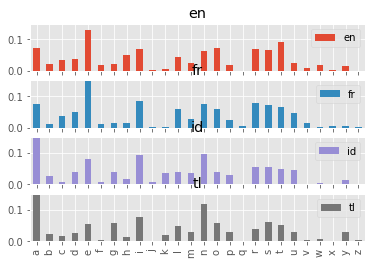

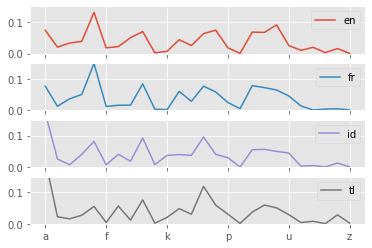

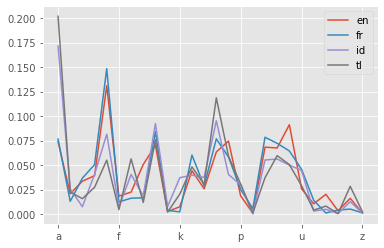

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json

## 알파벳 출현 빈도 데이터 읽어오기
with open('data/lang/freq.json', 'r', encoding='utf8') as fp :
    freq = json.load(fp)

## 각 언어마다 계산
lang_dic = {}
for i, lbl in enumerate(freq[0]['labels']) :    # data의 labels자료
    fq = freq[0]['freqs'][i]
    if not (lbl in lang_dic) :
        lang_dic[lbl] = fq
        continue
    
    for idx, v in enumerate(fq) :
        lang_dic[lbl][idx] = (lang_dic[lbl][idx] + v) / 2

### pandas의 데이터프레임에 넣기
asclist = [chr(n) for n in range(97, 97+26)]  # 아스키코드를 이용해 알파벳 리스트 만들기
df = pd.DataFrame(lang_dic, index=asclist)

### 그래프 그리기
plt.style.use('ggplot')
df.plot(kind='bar', subplots=True, ylim = (0,0.15))
plt.savefig('data/lang/lang-plot_bar.png')
plt.show()

plt.style.use('ggplot')
df.plot(kind='line',subplots=True, ylim = (0,0.15))
plt.savefig('data/lang/lang-plot_line.png')
plt.show()

plt.style.use('ggplot')
df.plot(kind='line')
plt.savefig('data/lang/lang-plot_line2.png')
plt.show()

##### 학습한 매개변수를 저장 ~ 웹 테스트 해보기 => root 폴더 확인 (lang-Webapp.py) 

In [66]:
from sklearn import svm
import joblib
import json

# 각 언어의 출현 빈도 데이터(JSON) 읽어 들이기
with open("data/lang/freq.json", "r", encoding="utf-8") as fp:
    d = json.load(fp)
    data = d[0]
    
# 데이터 학습하기
clf = svm.SVC()
clf.fit(data["freqs"], data["labels"])

# 학습 데이터 저장하기
joblib.dump(clf, "data/lang/freq.pkl")
print("ok")

ok


#### 웹으로 사용해보기 -> root폴더 확인 

#### SVM을 사용해 BMI 계산식을 사용하지 않고 비만 판정하기 

In [77]:
### 2만명의 데이터 만들기

import random

# BMI를 계산해서 레이블을 리턴하는 함수
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5: return "thin"
    if bmi < 25: return "normal"
    return "fat"

# 출력 파일 준비하기
fp = open("data/bmi.csv", "w", encoding="utf-8")
fp.write("height,weight,label\r\n")

# 무작위로 데이터 생성하기
cnt = {"thin":0, "normal":0, "fat":0}

for i in range (20000):
    h = random.randint(120,200)
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write("{0}, {1},{2}\r\n".format(h, w, label))
    
fp.close()
print("ok,", cnt)

ok, {'thin': 6457, 'normal': 5913, 'fat': 7630}


In [88]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# 키와 몸무게 데이터 읽어 들이기 (※1)
tbl = pd.read_csv ("data/bmi.csv")

# 칼럼(열)을 자르고 정규화하기 (※2)
label = tbl["label"]
w = tbl["weight"] / 100 # 최대 100kg라고 가정
h = tbl["height"] / 200 # 최대 200cm라고 가정
wh = pd.concat([w, h], axis=1)      # 최대 몸무게/키 대비 퍼센티지로 값을 정리하여 데이터프레임으로 만듬

# 학습 전용 데이터와 테스트 전용 데이터로 나누기 (3)
data_train, data_test, label_train, label_test = train_test_split(wh, label)

# 데이터 학습하기 ㅡ (4)
# clf = svm.SVC()           # svm.SVC() : 속도는 느리나 정답률은 높음
# clf = svm.LinearSVC()     # svm.LinearSVC() : 속도는 빠르나 정답률은 비교적 낮음
clf = svm.NuSVC()           # SVC랑 비슷한데, 속도는 NuSVC < SVC < LinearSVC인듯
clf.fit(data_train, label_train)

# 데이터 예측하기 ㅡ (85)
predict = clf.predict(data_test)

# 결과 테스트하기 ㅡ (※6)
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)

print('정답률 :',ac_score)
print('레포트 :')
print(cl_report)

정답률 : 0.9436
레포트 :
              precision    recall  f1-score   support

         fat       1.00      0.93      0.96      1923
      normal       0.84      0.99      0.91      1457
        thin       0.99      0.91      0.95      1620

    accuracy                           0.94      5000
   macro avg       0.94      0.95      0.94      5000
weighted avg       0.95      0.94      0.94      5000



In [ ]:
# 시각화
import matplotlib.pyplot as plt
import pandas as pd

# Pandas 로 CSV 파일 읽어 들이기
tbl = pd.read_csv("data/bmi.csv", index_col=2)

# 그래프 그리기 시작
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 서브 플롯 전용 - 지정한 레이블을 임의의 색으로 칠하기
def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b["weight"], b["height"], c=color, label=lbl)
    
scatter("fat", "red")
scatter("normal", "yellow")
scatter("thin", "purple")

ax.legend()
plt.savefig("data/bmi-test.png")
plt.show()                   
                               